In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

In [23]:
dataframe = pd.read_csv('/Users/ClayElmore/Desktop/neural_net_predictions/prices/prices.csv')
dataset = dataframe.values[0]
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)

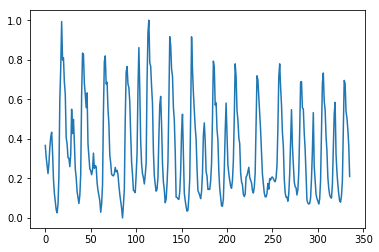

In [25]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
plt.plot(dataset)
plt.show()

Training: 225 	Testing: 111


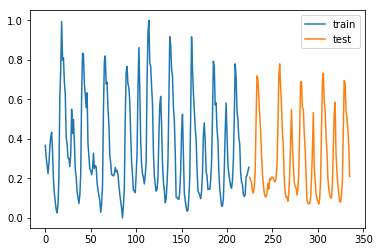

In [26]:
# make a training and testing set
frac_train = 0.67

# split into train and test sets
train_size = int(len(dataset) * frac_train)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print('Training:',len(train), '\tTesting:',len(test))
t_train = np.arange(train_size)
t_test = np.arange(test_size) + train_size
plt.plot(t_train,train)
plt.plot(t_test,test)
plt.legend(['train','test'])
plt.show()

In [52]:
# function to create a training and learning set
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# make a real dataset that can be used
look_back = 48
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [53]:
print('Shape of input X:',trainX.shape)
print('Shape of input Y:',trainY.shape)
print('Shape of test X:',testX.shape)
print('Shape of test Y:',testY.shape)
print('Shape of X Reason: [time steps, number of examples (time steps) in each input, features]')

Shape of input X: (176, 48, 1)
Shape of input Y: (176, 1)
Shape of test X: (62, 48, 1)
Shape of test Y: (62, 1)
Shape of X Reason: [time steps, number of examples (time steps) in each input, features]


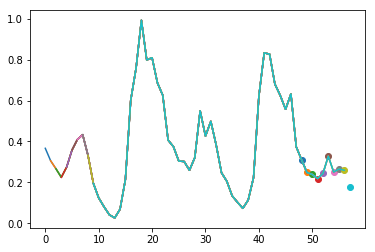

In [56]:
t = np.arange(trainX[0].T[0].shape[0])
for i in range(10):
    plt.plot(t+i,trainX[i].T[0],color = colors[i])
    plt.plot((t+i+1)[-1],trainY[i],'o',color = colors[i])
plt.show()
# plt.figure()
# plt.plot(trainY)
# plt.plot(dataset[48:]+1)
# plt.show()

In [51]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print('Reshaped training data:')
print('X:',trainX.shape)
print('Y:',trainY.shape)

Reshaped training data:
X: (176, 1, 48)
Y: (176, 1)


In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.0725
Epoch 2/100
 - 1s - loss: 0.0219
Epoch 3/100
 - 1s - loss: 0.0119
Epoch 4/100
 - 1s - loss: 0.0098
Epoch 5/100
 - 1s - loss: 0.0085
Epoch 6/100
 - 1s - loss: 0.0080
Epoch 7/100
 - 1s - loss: 0.0075
Epoch 8/100
 - 1s - loss: 0.0070
Epoch 9/100
 - 1s - loss: 0.0067
Epoch 10/100
 - 1s - loss: 0.0059
Epoch 11/100
 - 1s - loss: 0.0058
Epoch 12/100
 - 1s - loss: 0.0057
Epoch 13/100
 - 1s - loss: 0.0055
Epoch 14/100
 - 1s - loss: 0.0051
Epoch 15/100
 - 1s - loss: 0.0051
Epoch 16/100
 - 1s - loss: 0.0048
Epoch 17/100
 - 1s - loss: 0.0050
Epoch 18/100
 - 1s - loss: 0.0048
Epoch 19/100
 - 1s - loss: 0.0047
Epoch 20/100
 - 1s - loss: 0.0044
Epoch 21/100
 - 1s - loss: 0.0045
Epoch 22/100
 - 1s - loss: 0.0041
Epoch 23/100
 - 1s - loss: 0.0042
Epoch 24/100
 - 1s - loss: 0.0044
Epoch 25/100
 - 1s - loss: 0.0042
Epoch 26/100
 - 1s - loss: 0.0041
Epoch

In [18]:
# make predictions
trainPredict = model.predict(trainX)
print('Results Train Shape:',trainPredict.shape)
testPredict = model.predict(testX)
print('Results test Shape:',testPredict.shape)

Results Train Shape: (176, 1)
Results test Shape: (62, 1)


In [19]:
# revert the normalization
trainPredict = scaler.inverse_transform(trainPredict).T[0]
trainY = scaler.inverse_transform(trainY).T[0]
testPredict = scaler.inverse_transform(testPredict).T[0]
testY = scaler.inverse_transform(testY).T[0]
print('Non-normalized Results Train Shape:',trainPredict.shape)
print('Non-normalized Results test Shape:',testPredict.shape)

ValueError: Expected 2D array, got 1D array instead:
array=[35.06189  32.82042  32.45558  31.72745  32.65012  35.71686  32.90228
 33.41784  33.21165  30.24737  28.84722  27.85537  26.948217 24.805511
 26.30826  29.80474  43.43384  52.57403  53.64132  48.46922  48.79001
 43.8962   41.093365 35.33816  33.88891  31.78505  31.62926  31.50632
 31.91544  33.08496  32.27066  32.52728  31.78228  29.74934  28.10103
 26.83252  25.57044  23.76125  26.13669  29.09722  41.94881  50.62333
 51.67678  48.46191  47.78932  45.09506  39.12743  34.03085  31.69372
 28.82841  28.72725  28.43311  31.70984  35.61399  47.39894  55.17166
 47.52197  37.89188  33.65844  31.88876  31.19054  30.031021 31.65731
 33.87571  48.91034  57.9592   60.22016  52.37629  51.736275 47.98503
 44.8146   35.98612  31.55716  29.94215  28.69692  29.03682  31.20897
 38.6498   44.60564  46.17503  40.93611  33.76425  30.37561  28.91381
 26.57039  27.2308   30.0714   34.1273   44.8581   57.18465  55.67551
 51.20009  49.91039  44.17813  41.80729  36.05792  27.585098 27.53967
 27.294628 27.173138 28.60321  32.40415  39.646957 42.88699  35.48488
 28.34031  26.97135  25.80926  24.99906  25.16524  27.61084  31.047892
 42.590214 57.15826  51.208485 46.86125  43.6      40.45628  38.28291
 32.90869  28.79574  28.40299  27.92325  27.30999  28.63751  32.03413
 39.00695  41.29178  37.92385  32.27273  31.4867   29.01767  29.03267
 29.01528  30.59389  33.84449  41.99087  52.681965 51.54194  44.60306
 44.99444  40.10028  38.13613  32.33295  29.17177  27.473589 25.98109
 25.91841  27.285599 32.58163  39.60879  44.95133  39.11436  33.51234
 31.93228  30.64804  29.62492  29.22253  30.69695  34.28918  42.18439
 52.17659  49.84156  43.55679  41.83675  38.580524 37.44676  32.09106
 30.41806  29.85668  28.10959  27.69765  28.13751  31.3234   31.58592
 32.31218 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
error = np.mean(abs(trainPredict - trainY)/(trainY)) * 100
print('Training error %.2f' %error + '%')
error = np.mean(abs(testPredict - testY)/(testY)) * 100
print('Training error %.2f' %error + '%')

Training error 3.16%
Training error 99.04%


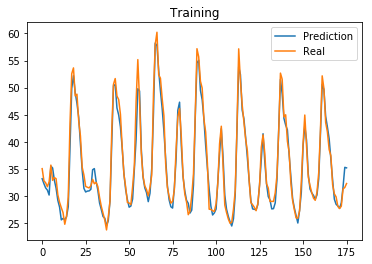

In [21]:
plt.plot(trainPredict,label = 'Prediction')
plt.plot(trainY,label = 'Real')
plt.legend()
plt.title('Training')
plt.show()

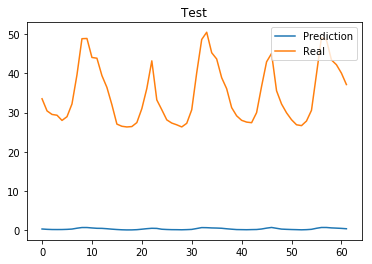

In [22]:
plt.plot(testPredict,label = 'Prediction')
plt.plot(testY,label = 'Real')
plt.legend()
plt.title('Test')
plt.show()